# Happiness Report Analysis #

In this project, I worked on a 2017 Happiness Score Report to figure out three questions listed below. I used two datasets and you can get access to them from here:https://www.kaggle.com/unsdsn/world-happiness/data#2019.csv
You might notice that there are datasets from 2018 and 2019, but I think that the datasets miss some columns, so I decided not to use them. 

Questions to explore:
- what are main factors contributing to the increase of Happiness Score?
- which regions in the world do have the highest average happiness scores? 
- Are there unique facotors contributing to making life evaluation higher in specific regions? 

A reason why I chose to work on this project is that since this is very first my personal project(did some guided projects though), I wanted to work on a dataset which does not require me to do a lot of context researches. Moreover, I was interested in those questions listed above. 


## Summary ##
Q1
- Based on my analysis, all of factors, listed in Happiness Score Report, except generosity contribute to the increse of life evaluation in each country. Especially, gdp_per_capita, family, and health factors are most influential factors of all since their correlatinos with Happiness scores are very strong. 

Q2
- A region, which has the highest average happiness score, is Australia and New Zealand. 2nd is North America, and 3rd is Wesstern Europe. I guess that there is no surprise for this because they are economically prosperous and therefore have environments where people can live in healthy life. 

Q3
- In Southeastern Asia, although gdp_per_capita and family are main factors, freedom and generosity seem to have more influencial to their life evaluation compared with other regions. In other regions, gdp_per_capita and family are main factors contributing to the increase of life evaluation. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
happiness2017 = pd.read_csv('2017.csv')

Store a csv file as happiness2017

## Basic Information of happiness2017 ##

In [4]:
happiness2017.shape

(155, 12)

There are 155 rows and 12 columns in this dataset. 

In [5]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### About values in columns ###
- **Happiness.Rank** indicate happiness score (0-10)
- Values in columns from **Economy..GDP.per.Capita** to **Generosity** describe the extent to which each of six factors contribute to making life evaluations higher in each country than they are in Dystopia. Dystopis is an imaginary country whose six factors are equal to world’s lowest national averages for each of the six factors. Sinmply, it is the least happy country. 

For instance, in Norway, **Economy..GDP.per.Capita** is the biggest contributor to making its Happiness evaluation higher. 

Note: World Happiness report mentioned that "note that we do not construct our happiness measure in each country using these six factors". They are just telling the extents. 

### Exploration ###

In [6]:
#replaced white spaces with underscore 
happiness2017.columns = happiness2017.columns.str.lower()

I lowered all letters since I personally think that it makes easire for me to work with this dataset

In [7]:
happiness2017.head()

,country,happiness.rank,happiness.score,whisker.high,whisker.low,economy..gdp.per.capita.,family,health..life.expectancy.,freedom,generosity,trust..government.corruption.,dystopia.residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
renaming = {'happiness.rank':"rank","happiness.score":"score",'economy..gdp.per.capita.':'gdp_capita',
            'health..life.expectancy.':'health','trust..government.corruption.':'trust'}
happiness2017.rename(renaming,axis =1,inplace=True)

Renamed columns

In [9]:
happiness2017.head()

,country,rank,score,whisker.high,whisker.low,gdp_capita,family,health,freedom,generosity,trust,dystopia.residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:
happiness2017.dtypes

country               object
rank                   int64
score                float64
whisker.high         float64
whisker.low          float64
gdp_capita           float64
family               float64
health               float64
freedom              float64
generosity           float64
trust                float64
dystopia.residual    float64
dtype: object

There is not variation of dtypes in this dataset. Almost all columns are float. 

In [11]:
happiness2017.isnull().sum()

country              0
rank                 0
score                0
whisker.high         0
whisker.low          0
gdp_capita           0
family               0
health               0
freedom              0
generosity           0
trust                0
dystopia.residual    0
dtype: int64

There is no null values in each column, so this data set seems like it is very clean. 

In [12]:
happiness2017.describe()

,rank,score,whisker.high,whisker.low,gdp_capita,family,health,freedom,generosity,trust,dystopia.residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [13]:
happiness2017[(happiness2017['gdp_capita']==0) | (happiness2017['family']==0)|
              (happiness2017['health']==0) | (happiness2017['freedom']==0)|
              (happiness2017['generosity']==0) | (happiness2017['trust']==0)]


,country,rank,score,whisker.high,whisker.low,gdp_capita,family,health,freedom,generosity,trust,dystopia.residual
86,Greece,87,5.227,5.325246,5.128754,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290,1.749222
89,Bosnia and Herzegovina,90,5.182,5.276336,5.087665,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173
138,Lesotho,139,3.808,4.044344,3.571656,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835
139,Angola,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


Because it is odd to me that there are 0s at minimum in each of 6 factors contributing to happiness rank, I checked which countries have the values. It might not be unusual to have those values in these countries. For instance, according to Wikipedia, Central Afrrican Republic has one of the poorest population. 

In [14]:
happiness2017.drop(['whisker.high','whisker.low','dystopia.residual'],inplace=True, axis = 1)

Since these three columns do not contribute to happiness meaasurement of each country, I dropped them.

## Main Factors Contributing to Happiness Scores ##

From now on, I will find main foctors contributing to making Happiness scores higher. To find relationships, I will calculate corralation between Hapiness score and each of six factors. 

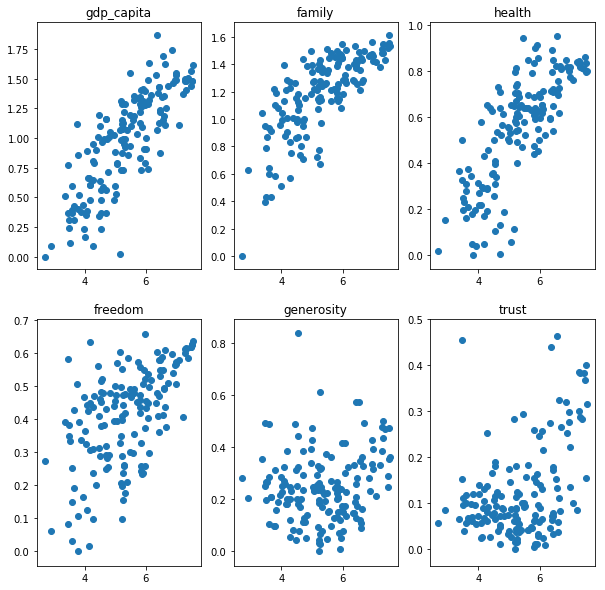

In [15]:
fig = plt.figure(figsize=(10,10))

num = 1
for label in happiness2017.columns[3:9]: 
    ax = fig.add_subplot(2,3,num)
    plt.scatter(happiness2017['score'],happiness2017[label])
    plt.title(label,loc='center')
    num +=1
plt.show()

In [16]:
correlation=happiness2017.corr()

In [17]:
correlation

,rank,score,gdp_capita,family,health,freedom,generosity,trust
rank,1.000000,-0.992774,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842
score,-0.992774,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080
gdp_capita,-0.813244,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944
family,-0.736753,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841
health,-0.780716,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752
freedom,-0.551608,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183
generosity,-0.132620,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159
trust,-0.405842,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000


In [18]:
correlation['score']

rank         -0.992774
score         1.000000
gdp_capita    0.812469
family        0.752737
health        0.781951
freedom       0.570137
generosity    0.155256
trust         0.429080
Name: score, dtype: float64

Strong positive correlation can be observed in all columns except generosity. Especially, gdp, family, and health have very strong correlatins with Happiness scores. 

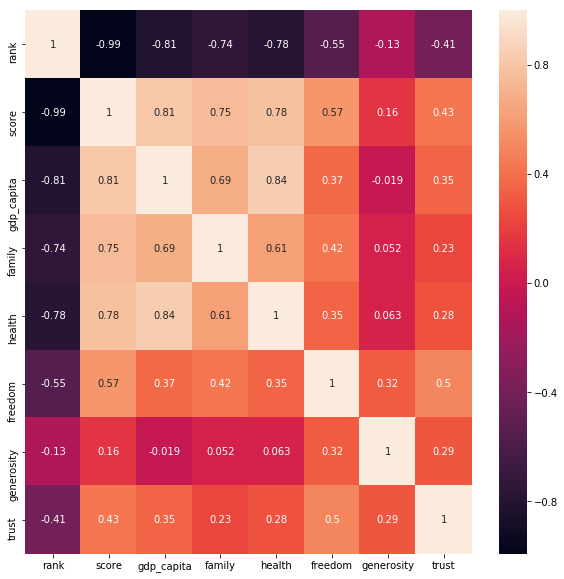

In [19]:
#for practice purposes, I also visualize the corrlation with heatmap. 
figure = plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True)

Given the scatter plots and correlation between Happiness score and each of six factors, strong and positive correlations can be observed in relationships between the score and six factors except generosity. 
Especially, gdp_capta, family, and health have very high correlation. Therefore, since the factors express the extent to which they contribute to making life evaluation higher, we can see a trend that more happier countries become, more influential to life evaluation the three factors become. In simpler words, in happy countries, the facotors are likely to be main factors to make the countries happier they are in dystopia. 
Since correlation cannot describe causality, I am not sure that increasing in those factors can make people happier. However, if there is an increase in one or more of the factors, people are likely to be happier. 
Thus, the answer for the first question is that all factors except generosity are likely to strongly contribute to making life evaluation higher. Especially, gdp, family, and health are really influential. 
However, I am not sure they 'CAUSE' the increase of life evaluation. 

## Average Happiness Score by Regions##

2017 happiness score dataset does not have a column describing countries' regions, but 2015 happiness dataset have a region column. So, I will add the region column to the 2017 dataset based on the 2015dataset. You can access to the dataset from the link I attached in the first cell. 

In [20]:
happiness2015 = pd.read_csv('2015.csv')

In [21]:
happiness2015.shape

(158, 12)

In [22]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
check = happiness2017['country'].isin(happiness2015['Country'])

In [24]:
happiness2017[~check]

,country,rank,score,gdp_capita,family,health,freedom,generosity,trust
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934
92,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410
110,Namibia,111,4.574,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794


Some countries in happiness2017 do not exist in hapiness2015. However, the number of them is small. Therefore, I will not lose significant amount of data when I combine two datasets. 

In [25]:
happiness2015.columns = happiness2015.columns.str.lower()

In [26]:
happiness2015[['country','region']].head()

,country,region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [27]:
happiness2017_region = pd.merge(happiness2017,happiness2015[['country','region']], on='country')

Merging(inner mergin) happiness2015 and happiness2017 datasets based on 'country' column. 

In [28]:
region_score = happiness2017_region.groupby('region',as_index=False)['score'].mean().sort_values(ascending=False,by='score')

In [29]:
region_score

,region,score
0,Australia and New Zealand,7.299000
5,North America,7.154500
9,Western Europe,6.703714
3,Latin America and Caribbean,5.957905
2,Eastern Asia,5.496500
6,Southeastern Asia,5.444875
1,Central and Eastern Europe,5.409931
4,Middle East and Northern Africa,5.369684
7,Southern Asia,4.628429
8,Sub-Saharan Africa,4.084722


Grouping data based on regions and culculating mean of happiness score in each region. Then, I sort the resulting dataset by the average score. 

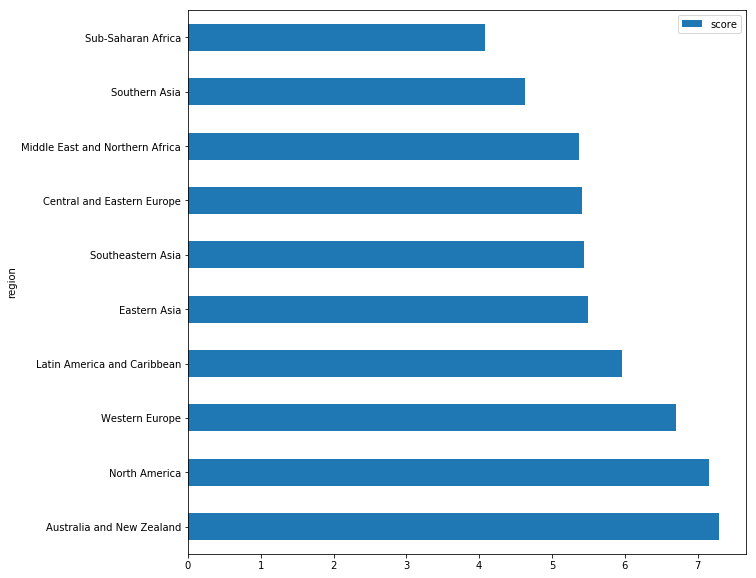

In [30]:
region_score.plot.barh(x='region',y='score',figsize=(10,10))

It can be observed that "North America" and "Aurstralia and New Zealand" regions have very high happiness scores on average. (sheeps are really great, I love them) 

## Contributing Factors by Regions##

In [31]:
happiness2017_avg = happiness2017_region.groupby('region',as_index=False).mean()

In [32]:
happiness2017_avg = happiness2017_avg.sort_values(by='score',ascending=False).set_index('region')

In [33]:
happiness2017_avg

,rank,score,gdp_capita,family,health,freedom,generosity,trust
region,,,,,,,,
Australia and New Zealand,9.000000,7.299000,1.445060,1.529119,0.830323,0.607835,0.488852,0.342000
North America,10.500000,7.154500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505
Western Europe,27.142857,6.703714,1.457411,1.444946,0.824673,0.515125,0.303497,0.218999
Latin America and Caribbean,50.809524,5.957905,1.011695,1.300096,0.618667,0.444541,0.209300,0.087344
Eastern Asia,71.250000,5.496500,1.231749,1.304615,0.778222,0.407620,0.173630,0.070685
Southeastern Asia,73.750000,5.444875,0.965253,1.249948,0.581918,0.534971,0.449860,0.127591
Central and Eastern Europe,75.068966,5.409931,1.092051,1.282285,0.636090,0.346609,0.186116,0.079620
Middle East and Northern Africa,76.421053,5.369684,1.168535,1.095511,0.605980,0.363768,0.199172,0.149084
Southern Asia,109.857143,4.628429,0.697479,0.931875,0.456658,0.398971,0.341446,0.103066


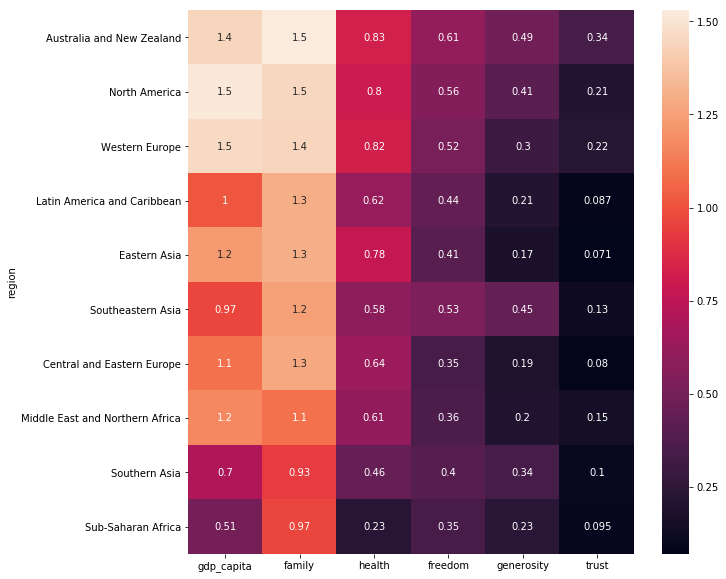

In [36]:
figure = figure = plt.figure(figsize=(10,10))
sns.heatmap(happiness2017_avg[['gdp_capita','family','health','freedom','generosity','trust']], annot=True)

When seeing this figure horizontally, we can see that in each region gdp_capita and family factors are main contributor to making life evaluation higher sicne they are brighter than other factors in the figure. However, in Southeastern Asia, it seems like that the difference in brightness between the two factors and other factos are slightly smaller than other regions. 
Therefore, I can argue that there are generally not unique factors contributing to making life evaluation higher in specific regions, but, in Southeastern Asia, freedom and generosity might have slightly more power to contribute to the increase of life evaluation than other regions. 